<a href="https://colab.research.google.com/github/booorayan/Regression_fifa/blob/master/Football_Match_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Football Match Outcomes Using Regression Models 

## 1. Defining the Question

### a) Specifying the Question



1.   Predict the number of goals scored by the home team
2.   Predict the number of goals scored by the away team
3.   Predict the outcome of a football match between team 1 and team 2





### b) Defining the Metric for Success



1.   A polynomial regression model that predicts the number of goals scored by the home team with above 50% accuracy
2.   A polynomial regression model that predicts the number of goals scored by the away team with an accuracy of above 50%
3.   A logistic regression model that predicts the outcome of a football match between team 1 and team 2






### c) Understanding the context 

The venue and ranking of national teams in football plays a role in the outcome of football matches. 

Teams that play at home are more likely to win than away teams.

Home teams are also more likely to score more goals than away teams.

### d) Recording the Experimental Design

The experimental design of this project was in adherence to the CRISP-DM methodology.
The project was conducted in the following phases:

1.   Problem Understanding
2.   Data Understanding
3.   Data Preparation
4.   Modelling
5.   Evaluation


### e) Data Relevance

The features/variables in the two datasets provided are relevant to the problem and can help predict the outcome and number of goals scored teams.

We can use rank to predict the number of goals scored by both away and home teams

We can use the home and away team names as well as home and away team ranks to predict the outcome of a football match.

## 2. Importing Required Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')


## 3. Reading the Data

In [69]:
# Loading the Dataset(s) to be analyzed
# 

ranking = pd.read_csv('fifa_ranking.csv')

# previewing the first five observations in the ranking dataframe

ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [70]:
# previewing the last five observations in the ranking dataframe

ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [71]:
# loading the second dataset
results = pd.read_csv('results.csv')

# previewing the first five observations in the results dataframe
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [72]:
# previewing the last five observations in the results dataframe
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [0]:
# creating copies of both datframes for later reference

ran_copy = ranking.copy()
res_copy = results.copy()

## 4. Exploring/Checking the Data

In [74]:
# Determining the no. of rows and columns in ranking dataset
#
ranking.shape

# ranking dataframe has 57793 rows and 16 columns

(57793, 16)

In [75]:
# determining the no. of rows and columns in results dataframe
results.shape

# ranking dataframe has 40839 rows and 9 columns

(40839, 9)

In [76]:
# checking for column datatypes and no. of non-null values in ranking dataframe

ranking.info()

# columns in ranking dataframe have 57793 non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [77]:
# checking for column datatypes and no. of non-null values in results dataframe
# 
results.info()

# columns in ranking dataframe have 40839 non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [78]:
# Checking whether each column in ranking dataframe has an appropriate datatype
#
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [79]:
# Checking whether each column in results dataframe has an appropriate datatype
#
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [80]:
# checking for columns in ranking dataframe
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [81]:
# checking for columns in results dataframe
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

## 5. Tidying the Dataset

In [82]:
# dropping columns that re not valid for analysis

ranking = ranking.drop(ranking.iloc[:,2:15], 1)

# previewing the first five observations of resulting dataframe
ranking.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [83]:
# previewing the last five observations of resulting dataframe
ranking.tail()

,rank,country_full,rank_date
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07
57792,206,Tonga,2018-06-07


In [84]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [85]:
# dropping columns not relevant to analysis

results = results.drop('city', 1)

# previewing the first five observations of resulting dataframe
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [86]:
# filtering our dataframe to work with matches not played on neutral ground
# in resulting dataframe, one of the two teams is at home

res_fil = results[results.neutral == False]

# previewing the last observations of resulting dataframe
res_fil.tail()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
40803,2019-07-08,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,False
40817,2019-07-12,Samoa,Tonga,2,0,Pacific Games,Samoa,False
40821,2019-07-13,India,North Korea,2,5,Intercontinental Cup,India,False
40829,2019-07-16,India,Syria,1,1,Intercontinental Cup,India,False
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Samoa,False


In [87]:
# checking for the unique values in tournament column. 

res_fil.tournament.unique()



array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'UEFA Euro qualification', 'UEFA Euro',
       'Merdeka Tournament', 'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Copa Juan Pinto Durán', 'UAFA Cup',
       'CONCACAF Championship', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Co

In [88]:
 
# tourna = ['Friendly', 'FIFA World Cup', 'Copa América', 'UEFA Euro']

res_f = res_fil
res_f.head()


,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [89]:
res_f.tail()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
40803,2019-07-08,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,False
40817,2019-07-12,Samoa,Tonga,2,0,Pacific Games,Samoa,False
40821,2019-07-13,India,North Korea,2,5,Intercontinental Cup,India,False
40829,2019-07-16,India,Syria,1,1,Intercontinental Cup,India,False
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Samoa,False


In [90]:
# splitting the date column in results dataframe to day, month and year columns 
res_f['year'] = pd.DatetimeIndex(res_f['date']).year
res_f['month'] = pd.DatetimeIndex(res_f['date']).month
res_f['day'] = pd.DatetimeIndex(res_f['date']).day

# previewing the first five observations
res_f.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3,4


In [91]:
# filtering our data to include years between 2006 and 2018
# same ranking system was used between 2006 and 2018

r_f = res_f[res_f['year'].between(2006,2018, inclusive=True)]

# previewing the first five observations
r_f.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,day
28033,2006-01-02,Qatar,Libya,2,0,Friendly,Qatar,False,2006,1,2
28034,2006-01-05,Egypt,Zimbabwe,2,0,Friendly,Egypt,False,2006,1,5
28036,2006-01-09,Morocco,DR Congo,3,0,Friendly,Morocco,False,2006,1,9
28038,2006-01-12,Tunisia,Libya,1,0,Friendly,Tunisia,False,2006,1,12
28039,2006-01-14,Egypt,South Africa,1,2,Friendly,Egypt,False,2006,1,14


In [92]:
# checking the datatypes of columns in resulting  dataframe
r_f.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
country       object
neutral         bool
year           int64
month          int64
day            int64
dtype: object

In [93]:
# creating a new column (status) that holds the outcome of a football match
# column holds three values: Win, Draw and Lose

status = []

for i in range(len(r_f['home_team'])):
  if r_f.home_score.iloc[i] > r_f.away_score.iloc[i]:
    status.append('Win')
  elif r_f['home_score'].iloc[i] < r_f.away_score.iloc[i]:
    status.append('Lose')
  else:
    status.append('Draw')
  
# creating new column and appending values to the r_f dataframe

r_f['status'] = status
r_f.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

# previewing the first ten observations
r_f.head(10)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,day,status
28033,2006-01-02,Qatar,Libya,2,0,Friendly,Qatar,False,2006,1,2,Win
28034,2006-01-05,Egypt,Zimbabwe,2,0,Friendly,Egypt,False,2006,1,5,Win
28036,2006-01-09,Morocco,DR Congo,3,0,Friendly,Morocco,False,2006,1,9,Win
28038,2006-01-12,Tunisia,Libya,1,0,Friendly,Tunisia,False,2006,1,12,Win
28039,2006-01-14,Egypt,South Africa,1,2,Friendly,Egypt,False,2006,1,14,Lose
28040,2006-01-14,Morocco,Zimbabwe,1,0,Friendly,Morocco,False,2006,1,14,Win
28041,2006-01-14,Senegal,DR Congo,0,0,Friendly,Senegal,False,2006,1,14,Draw
28042,2006-01-15,Tunisia,Ghana,2,0,Friendly,Tunisia,False,2006,1,15,Win
28044,2006-01-17,Morocco,Angola,2,2,Friendly,Morocco,False,2006,1,17,Draw
28045,2006-01-18,Saudi Arabia,Sweden,1,1,Friendly,Saudi Arabia,False,2006,1,18,Draw


In [94]:
# dropping columns not relevant for our analysis

res_fi = r_f.drop(['date','neutral'], 1)

# previewing the last five observations.
res_fi.tail()

,home_team,away_team,home_score,away_score,tournament,country,year,month,day,status
40338,Bahrain,Lebanon,1,0,Friendly,Bahrain,2018,12,27,Win
40340,Qatar,Algeria,0,1,Friendly,Qatar,2018,12,27,Lose
40343,United Arab Emirates,Kuwait,0,2,Friendly,United Arab Emirates,2018,12,28,Lose
40344,Bahrain,North Korea,4,0,Friendly,Bahrain,2018,12,29,Win
40350,Qatar,Iran,1,2,Friendly,Qatar,2018,12,31,Lose


In [95]:
# filtering dataset to remove observations that fall outside the ranking date. 

re = res_fi[~((res_fi['year'] == 2018) & (res_fi['month'] > 6))]

# checking the first five observations
re.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,day,status
28033,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win
28034,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,5,Win
28036,Morocco,DR Congo,3,0,Friendly,Morocco,2006,1,9,Win
28038,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,12,Win
28039,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,14,Lose


In [96]:
# checking the shape of the re dataframe
re.shape

(8403, 10)

In [97]:
# splitting the date column in ranking dataframe to day, month and year

ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year
ranking['month'] = pd.DatetimeIndex(ranking['rank_date']).month
ranking['day'] = pd.DatetimeIndex(ranking['rank_date']).day

# previewing the first five observations
ranking.head()

,rank,country_full,rank_date,year,month,day
0,1,Germany,1993-08-08,1993,8,8
1,2,Italy,1993-08-08,1993,8,8
2,3,Switzerland,1993-08-08,1993,8,8
3,4,Sweden,1993-08-08,1993,8,8
4,5,Argentina,1993-08-08,1993,8,8


In [98]:
# filtering results dataset to include observations between 2006 and 2018
# ranking system was the same between 2006 and 2008

rank_f = ranking[ranking['year'].between(2006,2018,inclusive=True)]

# previewing the first five observations
rank_f.head()

,rank,country_full,rank_date,year,month,day
26938,1,Brazil,2006-01-18,2006,1,18
26939,2,Czech Republic,2006-01-18,2006,1,18
26940,3,Netherlands,2006-01-18,2006,1,18
26941,4,Argentina,2006-01-18,2006,1,18
26942,5,Spain,2006-01-18,2006,1,18


In [99]:
# previewing the last five observations 
rank_f.tail()

,rank,country_full,rank_date,year,month,day
57788,206,Anguilla,2018-06-07,2018,6,7
57789,206,Bahamas,2018-06-07,2018,6,7
57790,206,Eritrea,2018-06-07,2018,6,7
57791,206,Somalia,2018-06-07,2018,6,7
57792,206,Tonga,2018-06-07,2018,6,7


In [100]:
# dropping rank_date column because it irrelevant for the analysis

ran_f = rank_f.drop('rank_date', 1)

# previewing the last observations of resulting dataframe
ran_f.tail()

,rank,country_full,year,month,day
57788,206,Anguilla,2018,6,7
57789,206,Bahamas,2018,6,7
57790,206,Eritrea,2018,6,7
57791,206,Somalia,2018,6,7
57792,206,Tonga,2018,6,7


In [101]:
# checking the shape of resulting dataframe (ran_f)
ran_f.shape

# resulting filtered ranking dataframe has 30855 rows and 5 columns

(30855, 5)

In [102]:
# previewing the descriptive statistics of the filtered results dataframe

r_f.describe()

,home_score,away_score,year,month,day
count,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000
mean,1.621809,1.001595,2011.950775,7.371809,14.091727
std,1.565140,1.186053,3.673432,3.109471,8.346957
min,0.000000,0.000000,2006.000000,1.000000,1.000000
25%,0.000000,0.000000,2009.000000,5.000000,7.000000
50%,1.000000,1.000000,2012.000000,8.000000,12.000000
75%,2.000000,2.000000,2015.000000,10.000000,21.000000
max,17.000000,13.000000,2018.000000,12.000000,31.000000


According to the output, the mean home_score is 1.62 while that of away_score is 1.00

The standard deviation of home_score is 1.565 while that of away_score is 1.186

The minimum home_score and away_score is 0

The maximum home_score is 17 goals and the maximum away_score is 13 goals

In [103]:
# checking the descriptive statistics of resulting ranking dataframe
ran_f.describe()


,rank,year,month,day
count,30855.000000,30855.000000,30855.00000,30855.000000
mean,104.448517,2011.837498,6.39987,12.843623
std,59.925802,3.604028,3.45617,6.902990
min,1.000000,2006.000000,1.00000,1.000000
25%,52.000000,2009.000000,3.00000,7.000000
50%,105.000000,2012.000000,6.00000,13.000000
75%,156.000000,2015.000000,9.00000,18.000000
max,209.000000,2018.000000,12.00000,31.000000


The mean rank is 104.45, the std of rank is 59.93, the minimum rank is 1 and max rank is 209

In [104]:
# merging the two dataframes (re and ran_f) to one dataframe to facilitate analysis and/or prediction
merged = pd.merge(re, ran_f, how='left', left_on=['month','year'], right_on=['month', 'year'])

# previewing the first ten observations
merged.head(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,day_x,status,rank,country_full,day_y
0,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,1.0,Brazil,18.0
1,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,2.0,Czech Republic,18.0
2,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,3.0,Netherlands,18.0
3,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,4.0,Argentina,18.0
4,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,5.0,Spain,18.0
5,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,5.0,France,18.0
6,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,7.0,Mexico,18.0
7,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,7.0,USA,18.0
8,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,9.0,England,18.0
9,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,10.0,Portugal,18.0


In [105]:
# checking for the columns present in our merged dataset

merged.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'year', 'month', 'day_x', 'status', 'rank', 'country_full',
       'day_y'],
      dtype='object')

In [106]:
# dropping irrelevant columns from the merged dataframe and previewing the first observations
merged.drop(['day_x', 'day_y'], 1, inplace=True)
merged.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,rank,country_full
0,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,1.0,Brazil
1,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,2.0,Czech Republic
2,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,3.0,Netherlands
3,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,4.0,Argentina
4,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,5.0,Spain


In [107]:
# selecting observations where the home_team is equal to country_full column
# this way, it will be possible to get the rank of the home_team

merg_home = merged[merged.home_team == merged.country_full]
merg_home.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,rank,country_full
88,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,89.0,Qatar
236,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,Win,32.0,Egypt
444,Morocco,DR Congo,3,0,Friendly,Morocco,2006,1,Win,35.0,Morocco
642,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,Win,28.0,Tunisia
851,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,Lose,32.0,Egypt


In [108]:
# renaming the rank column to home_rank

merg_home = merg_home.rename(columns={'rank':'home_rank'})
merg_home.tail()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,home_rank,country_full
1743074,Belgium,Costa Rica,4,1,Friendly,Belgium,2018,6,Win,3.0,Belgium
1743290,Poland,Lithuania,4,0,Friendly,Poland,2018,6,Win,8.0,Poland
1743563,Russia,Saudi Arabia,5,0,FIFA World Cup,Russia,2018,6,Win,70.0,Russia
1743774,Russia,Egypt,3,1,FIFA World Cup,Russia,2018,6,Win,70.0,Russia
1743985,Russia,Uruguay,0,3,FIFA World Cup,Russia,2018,6,Lose,70.0,Russia


In [109]:
# selecting observations where the away_team is equal to country_full column
# this way, it will be possible to get the rank of the away_team
merg_away = merged[merged.away_team == merged.country_full]
merg_away.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,rank,country_full
80,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,80.0,Libya
257,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,Win,53.0,Zimbabwe
695,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,Win,80.0,Libya
868,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,Lose,49.0,South Africa
1077,Morocco,Zimbabwe,1,0,Friendly,Morocco,2006,1,Win,53.0,Zimbabwe


In [110]:
# renaming the rank column in merg_away dataframe to away_rank
merg_away = merg_away.rename({'rank': 'away_rank'}, axis=1)
merg_away.head(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,away_rank,country_full
80,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,80.0,Libya
257,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,Win,53.0,Zimbabwe
695,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,Win,80.0,Libya
868,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,Lose,49.0,South Africa
1077,Morocco,Zimbabwe,1,0,Friendly,Morocco,2006,1,Win,53.0,Zimbabwe
1484,Tunisia,Ghana,2,0,Friendly,Tunisia,2006,1,Win,50.0,Ghana
1702,Morocco,Angola,2,2,Friendly,Morocco,2006,1,Draw,63.0,Angola
1858,Saudi Arabia,Sweden,1,1,Friendly,Saudi Arabia,2006,1,Draw,14.0,Sweden
2335,Egypt,Libya,3,0,African Cup of Nations,Egypt,2006,1,Win,80.0,Libya
2505,Saudi Arabia,Finland,1,1,Friendly,Saudi Arabia,2006,1,Draw,46.0,Finland


In [111]:
# print a summary of the merg_away dataframe
merg_away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7581 entries, 80 to 1743929
Data columns (total 11 columns):
home_team       7581 non-null object
away_team       7581 non-null object
home_score      7581 non-null int64
away_score      7581 non-null int64
tournament      7581 non-null object
country         7581 non-null object
year            7581 non-null int64
month           7581 non-null int64
status          7581 non-null object
away_rank       7581 non-null float64
country_full    7581 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 710.7+ KB


In [0]:
# dropping the country column because it is invalid for the analysis
merg_away.drop('country', 1, inplace=True)

In [113]:
# merging the merg_home and merg_away dataframes to get a dataframe that has the home and away rank columns
fin_com = pd.merge(merg_home, merg_away, how='left', left_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'month', 'status'], right_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'month', 'status'])

# previewing the first ten observations
fin_com.tail(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,home_rank,country_full_x,away_rank,country_full_y
7687,Latvia,Azerbaijan,1,3,Friendly,Latvia,2018,6,Lose,129.0,Latvia,105.0,Azerbaijan
7688,Finland,Belarus,2,0,Friendly,Finland,2018,6,Win,63.0,Finland,78.0,Belarus
7689,France,United States,1,1,Friendly,France,2018,6,Draw,7.0,France,NaN,NaN
7690,Austria,Brazil,0,3,Friendly,Austria,2018,6,Lose,26.0,Austria,2.0,Brazil
7691,India,Kenya,2,0,Intercontinental Cup,India,2018,6,Win,97.0,India,112.0,Kenya
7692,Belgium,Costa Rica,4,1,Friendly,Belgium,2018,6,Win,3.0,Belgium,23.0,Costa Rica
7693,Poland,Lithuania,4,0,Friendly,Poland,2018,6,Win,8.0,Poland,126.0,Lithuania
7694,Russia,Saudi Arabia,5,0,FIFA World Cup,Russia,2018,6,Win,70.0,Russia,67.0,Saudi Arabia
7695,Russia,Egypt,3,1,FIFA World Cup,Russia,2018,6,Win,70.0,Russia,45.0,Egypt
7696,Russia,Uruguay,0,3,FIFA World Cup,Russia,2018,6,Lose,70.0,Russia,14.0,Uruguay


In [114]:
# checking the columns in the fin_com dataframe
fin_com.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'year', 'month', 'status', 'home_rank', 'country_full_x',
       'away_rank', 'country_full_y'],
      dtype='object')

In [115]:
# printing a summary of fin_com dataframe
fin_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 7696
Data columns (total 13 columns):
home_team         7697 non-null object
away_team         7697 non-null object
home_score        7697 non-null int64
away_score        7697 non-null int64
tournament        7697 non-null object
country           7697 non-null object
year              7697 non-null int64
month             7697 non-null int64
status            7697 non-null object
home_rank         7697 non-null float64
country_full_x    7697 non-null object
away_rank         7066 non-null float64
country_full_y    7066 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 841.9+ KB


In [116]:
# dropping 'country_full_x', 'country_full_y' and 'country' columns as they are not relevant for analysis
fin_com = fin_com.drop(['country_full_x', 'country_full_y', 'country'], 1)
fin_com.head(10)

,home_team,away_team,home_score,away_score,tournament,year,month,status,home_rank,away_rank
0,Qatar,Libya,2,0,Friendly,2006,1,Win,89.0,80.0
1,Egypt,Zimbabwe,2,0,Friendly,2006,1,Win,32.0,53.0
2,Morocco,DR Congo,3,0,Friendly,2006,1,Win,35.0,NaN
3,Tunisia,Libya,1,0,Friendly,2006,1,Win,28.0,80.0
4,Egypt,South Africa,1,2,Friendly,2006,1,Lose,32.0,49.0
5,Morocco,Zimbabwe,1,0,Friendly,2006,1,Win,35.0,53.0
6,Senegal,DR Congo,0,0,Friendly,2006,1,Draw,30.0,NaN
7,Tunisia,Ghana,2,0,Friendly,2006,1,Win,28.0,50.0
8,Morocco,Angola,2,2,Friendly,2006,1,Draw,35.0,63.0
9,Saudi Arabia,Sweden,1,1,Friendly,2006,1,Draw,33.0,14.0


In [117]:
# checking a summary of the dataframe
fin_com.info()

# according to output, away_rank column has missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 7696
Data columns (total 10 columns):
home_team     7697 non-null object
away_team     7697 non-null object
home_score    7697 non-null int64
away_score    7697 non-null int64
tournament    7697 non-null object
year          7697 non-null int64
month         7697 non-null int64
status        7697 non-null object
home_rank     7697 non-null float64
away_rank     7066 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 661.5+ KB


In [118]:
# dropping the null values from the dataframe
fin_com.dropna(inplace=True)

# confirming null values have been dropped
fin_com.isnull().sum()

# output indicates no missing values

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
year          0
month         0
status        0
home_rank     0
away_rank     0
dtype: int64

In [119]:
# previewing the first ten observations

fin_com.tail(10)

,home_team,away_team,home_score,away_score,tournament,year,month,status,home_rank,away_rank
7686,Estonia,Morocco,1,3,Friendly,2018,6,Lose,94.0,41.0
7687,Latvia,Azerbaijan,1,3,Friendly,2018,6,Lose,129.0,105.0
7688,Finland,Belarus,2,0,Friendly,2018,6,Win,63.0,78.0
7690,Austria,Brazil,0,3,Friendly,2018,6,Lose,26.0,2.0
7691,India,Kenya,2,0,Intercontinental Cup,2018,6,Win,97.0,112.0
7692,Belgium,Costa Rica,4,1,Friendly,2018,6,Win,3.0,23.0
7693,Poland,Lithuania,4,0,Friendly,2018,6,Win,8.0,126.0
7694,Russia,Saudi Arabia,5,0,FIFA World Cup,2018,6,Win,70.0,67.0
7695,Russia,Egypt,3,1,FIFA World Cup,2018,6,Win,70.0,45.0
7696,Russia,Uruguay,0,3,FIFA World Cup,2018,6,Lose,70.0,14.0


In [120]:
# previewing the last ten observations

fin_com.tail()

,home_team,away_team,home_score,away_score,tournament,year,month,status,home_rank,away_rank
7692,Belgium,Costa Rica,4,1,Friendly,2018,6,Win,3.0,23.0
7693,Poland,Lithuania,4,0,Friendly,2018,6,Win,8.0,126.0
7694,Russia,Saudi Arabia,5,0,FIFA World Cup,2018,6,Win,70.0,67.0
7695,Russia,Egypt,3,1,FIFA World Cup,2018,6,Win,70.0,45.0
7696,Russia,Uruguay,0,3,FIFA World Cup,2018,6,Lose,70.0,14.0


## Exploratory Data Analysis

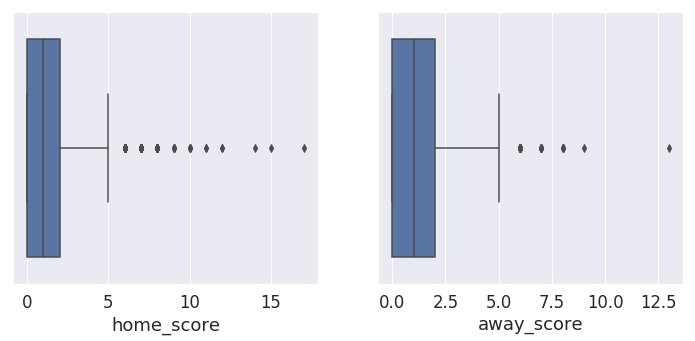

In [121]:
# using boxplots to check for outliers in home_score and away_score
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(fin_com.home_score, ax=ax1)
sns.boxplot(fin_com.away_score, ax=ax2)

plt.show()

Output indicates presence of outliers in home_score and away_score columns

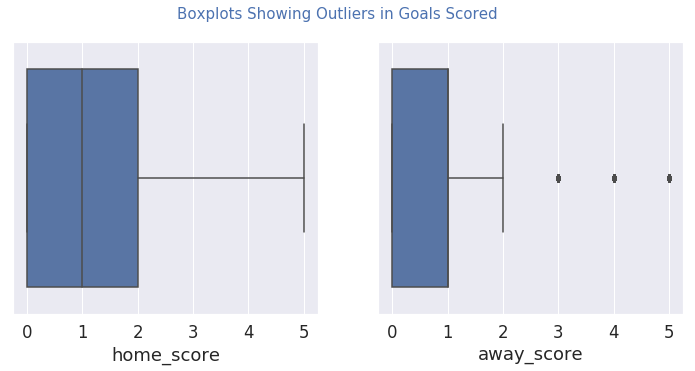

In [122]:
# using IQR method to remov outliers.
# we remove outliers since regression models do not work best with outliers

Q1 = fin_com.quantile(0.25)
Q3 = fin_com.quantile(0.75)

IQR = Q3 - Q1


# defining a new dataframe that excludes the outliers
out_f = fin_com[~((fin_com < (Q1 - 1.5 * IQR)) | (fin_com > (Q3 + 1.5 * IQR)))]

# plotting boxplots of home_score and away_score in the resulting dataframe
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(out_f.home_score, ax=ax1)
sns.boxplot(out_f.away_score, ax=ax2)
fig.suptitle('Boxplots Showing Outliers in Goals Scored', fontsize=15, color='b')

plt.show()

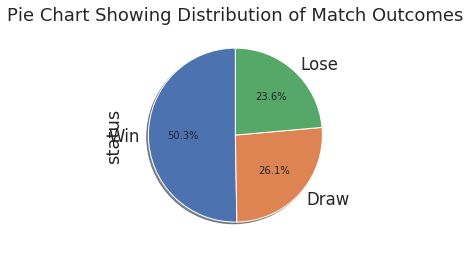

In [123]:
# pie chart to show distribution of outcomes

out_f.status.value_counts().plot(kind='pie', labels=['Win', 'Draw', 'Lose'], startangle=90, shadow= True, autopct='%1.1f%%')
plt.title('Pie Chart Showing Distribution of Match Outcomes')
plt.show()

# In most cases, the home team has a 49.5% chance of winning
# the chances of the home team getting a draw are also higher than the chances of the team losing

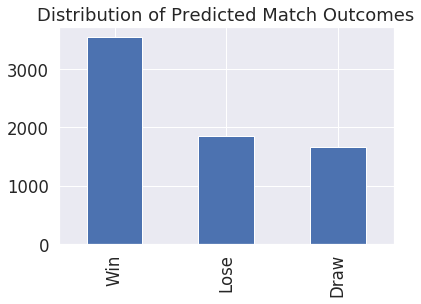

In [124]:
# plotting a barplot to show distribution of match outcomes
out_f.status.value_counts().plot(kind='bar')
plt.title('Distribution of Predicted Match Outcomes')
plt.show()

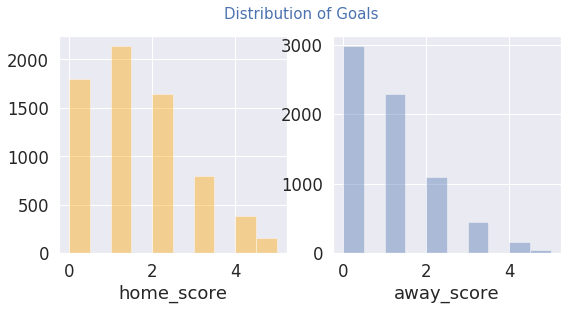

In [125]:
# plotting histograms to show the distribution of homw and away goals

fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2, figsize=(9,4))
sns.distplot(out_f['home_score'], bins=10, ax =ax1, kde=False, color='orange')
sns.distplot(out_f['away_score'], bins=10, ax =ax2, kde=False)
fig.suptitle('Distribution of Goals', fontsize=15, color='b')
plt.show()

Most home teams scored between 0 - 2 goals

Most away goals scored between 0 and 1 goals

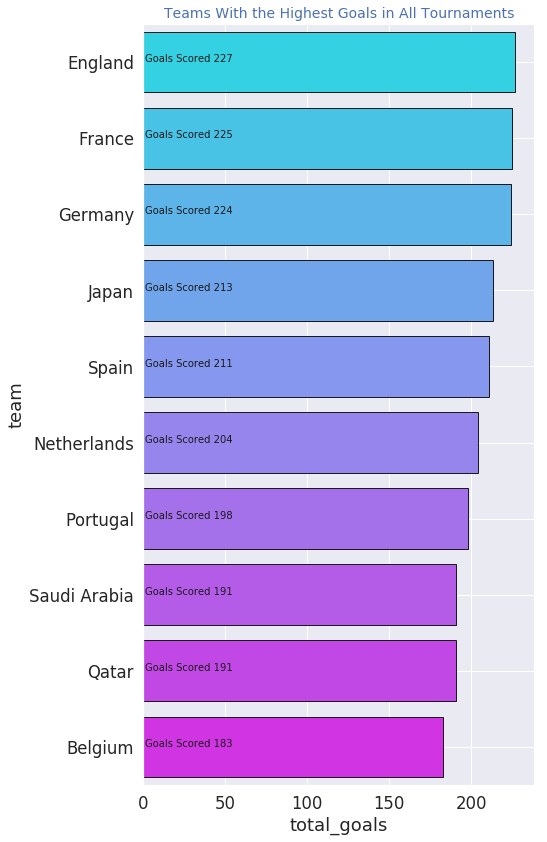

In [126]:
# plotting a barplot to show teams with the highest total goals scored between 2006 and 2018

# creating a new dataframe that contains home_team and home_score as columns
grp_h = out_f.groupby('home_team')['home_score'].sum().reset_index()

# renaming the columns to team and total_goals
grp_h.columns = ['team', 'total_goals']

# creating a new dataframe that contains away_team and away_score as columns
grp_a = out_f.groupby('away_team')['away_score'].sum().reset_index()

# renaming the columns to team and total_goals
grp_a.columns = ['team', 'total_goals']

# concating the two dataframes
total_goals = pd.concat([grp_h,grp_a], axis=0)
total_goals.head(10)

# creating a new dataframe that contains total goals
total_goals = total_goals.groupby('team')['total_goals'].sum().reset_index()

# sorting values in resulting dataframe
total_goals = total_goals.sort_values('total_goals', ascending=False)

# changing the datatype of total_goals column to integer
total_goals['total_goals'] = total_goals['total_goals'].astype(int)

# plotting the barplot
plt.figure(figsize=(7,14))
ax = sns.barplot('total_goals', 'team', data=total_goals[:10], palette='cool',\
                linewidth=1, edgecolor="k"*10)

for i,j in enumerate('Goals Scored ' + total_goals['total_goals'][:10].astype(str)):  
  ax.text(.7,i,j,fontsize=10, color="k")
  
plt.title('Teams With the Highest Goals in All Tournaments', fontsize=14, color='b')
plt.grid(True)
plt.show()



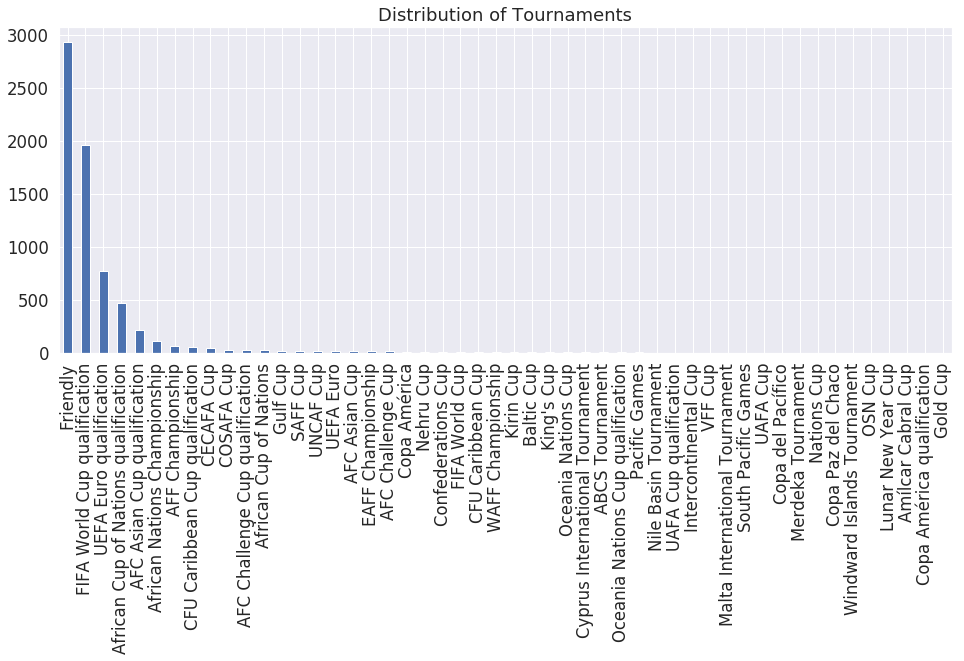

In [127]:
# plotting the distribution of different tournaments

out_f.tournament.value_counts().plot.bar(figsize=(16,6))
plt.title('Distribution of Tournaments')
plt.show()

In [128]:
out_f.describe()

,home_score,away_score,year,month,home_rank,away_rank
count,6909.000000,7020.000000,7066.000000,7066.000000,7066.000000,7066.000000
mean,1.463598,0.950285,2011.658506,7.259977,79.941410,82.385367
std,1.265443,1.062893,3.480224,3.142058,51.680358,53.051111
min,0.000000,0.000000,2006.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2009.000000,5.000000,36.000000,37.000000
50%,1.000000,1.000000,2012.000000,8.000000,76.000000,78.000000
75%,2.000000,1.000000,2015.000000,10.000000,118.000000,121.000000
max,5.000000,5.000000,2018.000000,12.000000,209.000000,209.000000


The mean home_score is 1.46 goals, mean away_score is 0.95 goals

The standard deviation of home_score is 1.27 and that of away_score is 1.06

The minimum home_score is 0 goals, maximum home_score is 5 goals

The minimum away_score is 0 goals, maximum away_score is 5 goals

Most matches played were Friendly matches, World cup qualifications and UEFA Euro qualification tournaments.

In [129]:
out_f.isnull().sum()

home_team       0
away_team       0
home_score    157
away_score     46
tournament      0
year            0
month           0
status          0
home_rank       0
away_rank       0
dtype: int64

In [0]:
out_f.dropna(inplace=True)

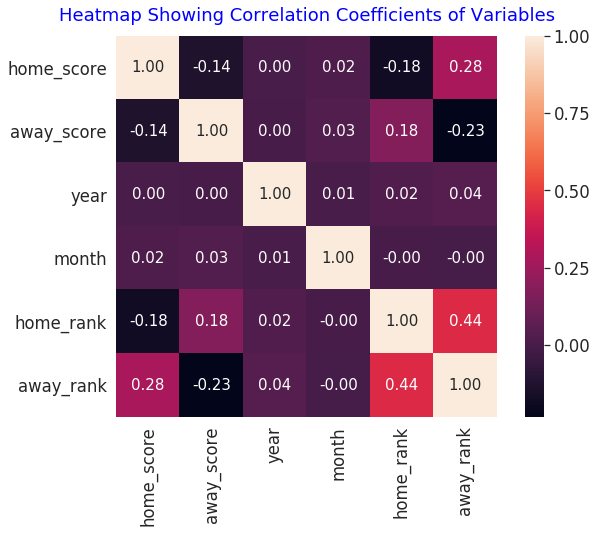

In [131]:
# plotting a heatmap to view correlation coefficients

cols = ['home_score', 'away_score', 'year', 'month', 'home_rank', 'away_rank']
cm = np.corrcoef(out_f[cols].values.T)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
hm = sns.heatmap(
    cm, cbar=True, annot=True, 
    square=True, fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.title('Heatmap Showing Correlation Coefficients of Variables', pad=15, color='blue')
plt.show()

According to the output, there is little to no correlation between the variables in the dataframe as the correlation coefficients range between 0 to 0.5

##  Implementing the Solution

### Checking for Mulitcollinearity

In [132]:
# displaying the correlation between variables

correlations = out_f.corr()
correlations

,home_score,away_score,year,month,home_rank,away_rank
home_score,1.000000,-0.135530,0.004606,0.022131,-0.178927,0.278395
away_score,-0.135530,1.000000,0.000002,0.030520,0.181210,-0.232537
year,0.004606,0.000002,1.000000,0.006370,0.022842,0.043264
month,0.022131,0.030520,0.006370,1.000000,-0.000860,-0.004882
home_rank,-0.178927,0.181210,0.022842,-0.000860,1.000000,0.441626
away_rank,0.278395,-0.232537,0.043264,-0.004882,0.441626,1.000000


In [133]:
# calculating the VIF score for each numerical variable
pd.DataFrame(np.linalg.inv(correlations.values), index=correlations.index, columns=correlations.columns)

,home_score,away_score,year,month,home_rank,away_rank
home_score,1.238814,-0.051370,0.008130,-0.028271,0.482697,-0.570486
away_score,-0.051370,1.185722,-0.010482,-0.033000,-0.437356,0.483466
year,0.008130,-0.010482,1.002076,-0.006480,0.002106,-0.049016
month,-0.028271,-0.033000,-0.006480,1.001701,-0.000547,0.005609
home_rank,0.482697,-0.437356,0.002106,-0.000547,1.577548,-0.932862
away_rank,-0.570486,0.483466,-0.049016,0.005609,-0.932862,1.685369


In [0]:
# the variables are not correlated as the VIF score of each variable is close to 1
# therefore, we do not drop any variable

### Polynomial Regression

In [135]:
# previewing the columns 
out_f.columns


Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'year', 'month', 'status', 'home_rank', 'away_rank'],
      dtype='object')

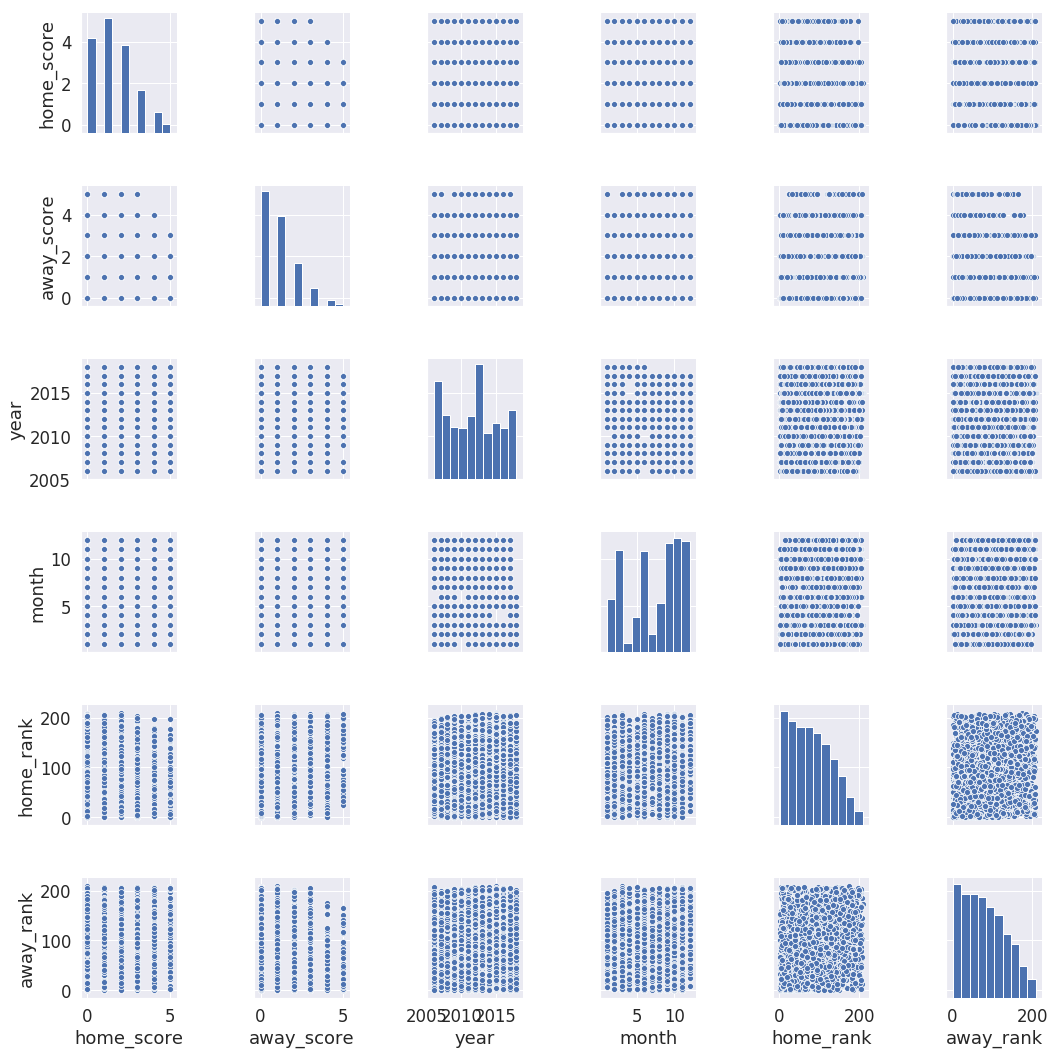

In [136]:
sns.pairplot(out_f[cols], height=2.5)
plt.tight_layout()
plt.show()

In [0]:
# mod = pd.get_dummies(out_f, drop_first=True)
# mod.head()

#### Model that Predicts the Goals Scored by Home Team

In [138]:
# using home_rank to determine goals scored by the home team
mod_df = out_f[['home_rank', 'home_score']]
mod_df.head()



,home_rank,home_score
0,89.0,2.0
1,32.0,2.0
3,28.0,1.0
4,32.0,1.0
5,35.0,1.0


In [139]:
# checking for null values

mod_df.isnull().sum()

home_rank     0
home_score    0
dtype: int64

In [0]:
# removing missing values
mod_df.dropna(inplace=True)

In [0]:
# specifying the features and target variables
feat = mod_df.home_rank.values.reshape(-1,1)

feat_fit = np.arange(feat.min(), feat.max(), 1)[:, np.newaxis]
lebo = mod_df.home_score.values.reshape(-1,1)


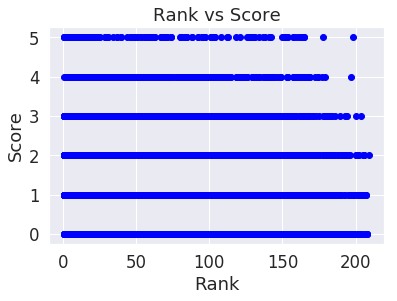

In [142]:
# plotting a scatter plot to show the relationship between home rank and home score
plt.scatter(feat, lebo, color='blue') 
plt.title('Rank vs Score')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()

output reveals no correlation between home rank and home score

In [143]:
# splitting features and target variables to training and testing sets
feat_train, feat_test, lebo_train, lebo_test = train_test_split(feat,lebo, test_size=0.3, random_state=23)
lebo_train

array([[0.],
       [2.],
       [2.],
       ...,
       [2.],
       [0.],
       [0.]])

In [0]:
# creating quadratic and cubic polynomial features

# instatntiating the quadratic polynomial features
quadratic = PolynomialFeatures(degree=2)

# instantiating the cubic polynomial features
cubic = PolynomialFeatures(degree=3)

# fitting the polynomial objects with training data
x_quad = quadratic.fit_transform(feat_train)
x_test = quadratic.fit_transform(feat_test)
x_cube = cubic.fit_transform(feat_train)

# instantiating the linear regression
lin= LinearRegression()
quad = lin.fit(feat_train, lebo_train)
y_lin = lin.predict(feat_fit)
l_r2 = r2_score(lebo_test, lin.predict(feat_test))

In [145]:
# fitting/training the polynomial features using linear regression

linpol = lin.fit(x_quad, lebo_train)

# making predictions
y_quad_fit = linpol.predict(quadratic.fit_transform(feat_fit))

# calculating R squared

polpre = linpol.predict(x_quad)
quad_r2 = r2_score(lebo_train, polpre)
# round_pre = [round(value) for value in polpre]

# print(round_pre)
print('Quad RMSE: ', np.sqrt(mean_squared_error(lebo_train, polpre)), '\nQuad r_squared: ', quad_r2)

Quad RMSE:  1.2426702058088626 
Quad r_squared:  0.03131923903124467


In [205]:
round_pre = [np.round(value) for value in polpre]

print('Quad RMSE: ', np.sqrt(mean_squared_error(lebo_train, round_pre)), '\nQuad r_squared: ', quad_r2)

Quad RMSE:  1.2893272261480382 
Quad r_squared:  0.03131923903124467


In [146]:
# getting the residuals to check for heteroskedasticity 
resid = np.subtract(polpre, lebo_train)
pd.DataFrame(resid)

resid.mean()

-3.106036105529164e-17

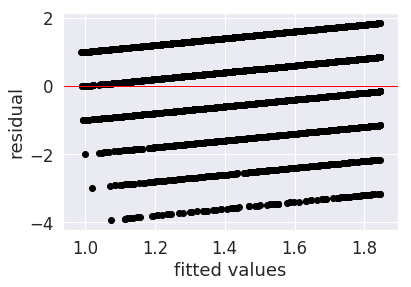

In [147]:
# plotting the residuals 

plt.scatter(polpre, resid, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= resid.mean(), color='red', linewidth=1)
plt.show()

In [148]:
import scipy as sp

test_result, p_val = sp.stats.bartlett(polpre.flatten(), resid.flatten())

degree_of_f = len(polpre)-1
prob = 1 - p_val

critical_value = sp.stats.chi2.ppf(prob, degree_of_f)
print(p_val)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



0.0
the variances are homogeneous!


In [149]:
lincub = lin.fit(x_cube, lebo_train)

# making predictions
y_cube_fit = lincub.predict(cubic.fit_transform(feat_fit))

# calculating R squared
# quad_r2 = r2_score(lebo_test, linpol.predict(x_quad))
cubpre = linpol.predict(x_cube)
cub_r2 = r2_score(lebo_train, cubpre)

print('Cubic RMSE: ', np.sqrt(mean_squared_error(lebo_train, cubpre)), '\nCubic r_squared: ', cub_r2)


Cubic RMSE:  1.2400191714435616 
Cubic r_squared:  0.03544787551614892


Low r2 score shows that polynomial regression does not explain a great deal of the dependent variable and therefore, is not the best model for prediction

In [206]:
# rounding off predictions
cuber_pre = [np.round(value) for value in cubpre]

# determining rmse with rounded poff predictions
print('Quad RMSE: ', np.sqrt(mean_squared_error(lebo_train, cuber_pre)), '\nQuad r_squared: ', quad_r2)

Quad RMSE:  1.287064963324237 
Quad r_squared:  0.03131923903124467


In [150]:
# getting the residuals of the model
residuals = np.subtract(cubpre, lebo_train)
pd.DataFrame(residuals)

residuals.mean()

-3.986079668762427e-16

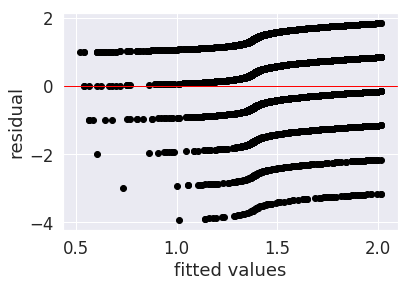

In [151]:
# plotting the residuals 

plt.scatter(cubpre, resid, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= resid.mean(), color='red', linewidth=1)
plt.show()

In [152]:
# determining heteroskedasticity using bartlet's test

test_res, p_valu = sp.stats.bartlett(cubpre.flatten(), resid.flatten())

degree_of_fre = len(cubpre)-1
proba = 1 - p_valu

critical_valu = sp.stats.chi2.ppf(proba, degree_of_fre)
print(p_valu)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_res > critical_valu):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



0.0
the variances are homogeneous!


Output reveals lack of heteroskedasticity as the difference in actual and predicted values is homogeneous

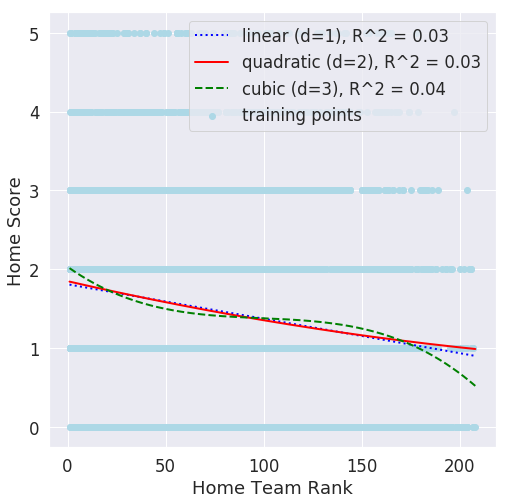

In [153]:
#  Plotting the results
plt.figure(figsize=(8, 8))
plt.scatter(feat_train, lebo_train, label='training points', color='lightblue')
plt.plot(
    feat_fit, y_lin,
    label=f'linear (d=1), R^2 = {l_r2:.2f}',
    color='blue', lw=2, linestyle=':'
)
plt.plot(
    feat_fit, y_quad_fit,
    label=f'quadratic (d=2), R^2 = {quad_r2:.2f}',
    color='red', lw=2, linestyle='-'
)
plt.plot(
    feat_fit, y_cube_fit,
    label=f'cubic (d=3), R^2 = {cub_r2:.2f}',
    color='green', lw=2, linestyle='--'
)

plt.xlabel('Home Team Rank')
plt.ylabel('Home Score')
plt.legend(loc='upper right')
plt.show()

According to the graph, a polynomial regression model with 3 degrees is better suited for prediction in comparison to the linear regression model and a ploynomial regression model with 2 degrees.

In [154]:
# determining heteroskedasticity using bartlet's test

norm = [True, False]
fit_int = [True, False]

paras = dict(normalize=norm, fit_intercept=fit_int)

# instantiating a 10-fold cross validation
kfolds = KFold(n_splits=10)

grids = GridSearchCV(estimator=lin, param_grid= paras, cv= kfolds, scoring='neg_mean_squared_error')

# fitting the gridsearch

grid_rslt = grids.fit(feat, lebo)

print('Best score: {}' .format(grids.best_score_))
print('Best parameters: {}' .format(grids.best_params_))

Best score: -1.5514681138665352
Best parameters: {'fit_intercept': True, 'normalize': True}


#### Model that Predicts Goals Scored by Away Team

In [155]:
# using home_rank to determine goals scored by the home team
moda_df = out_f[['away_rank', 'away_score']]
moda_df.head()



,away_rank,away_score
0,80.0,0.0
1,53.0,0.0
3,80.0,0.0
4,49.0,2.0
5,53.0,0.0


In [156]:
# checking for missing values

moda_df.isnull().sum()

away_rank     0
away_score    0
dtype: int64

In [0]:
# dropping missing values
moda_df.dropna(inplace=True)

In [0]:
# specifying the features and target variables for the model

ficha = moda_df.away_rank.values.reshape(-1,1)

ficha_fit = np.arange(ficha.min(), ficha.max(), 1)[:, np.newaxis]
lebos = moda_df.away_score.values.reshape(-1,1)


In [159]:
# splitting the features and target variables to training and test sets

ficha_train, ficha_test, lebos_train, lebos_test = train_test_split(ficha,lebos, test_size=0.3, random_state=230)
lebos_train

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [0]:
# instantiating the polynomial regression model for 2 and 3 degrees
quad = PolynomialFeatures(degree=2)
cub = PolynomialFeatures(degree=3)

# fitting the quadratic and cubic models using training set
xx_quad = quadratic.fit_transform(ficha_train)
xx_test = quadratic.fit_transform(ficha_test)
xx_cube = cubic.fit_transform(ficha_train)

# instantiating the linear regression object
linr = LinearRegression()
quad_f = linr.fit(ficha_train, lebos_train)

# predicting using linear regression
y_lin_p = linr.predict(ficha_fit)

# getting r2 score using linear regression
al_r2 = r2_score(lebos_test, linr.predict(ficha_test))


In [161]:
linrpol = linr.fit(xx_quad, lebos_train)

# making predictions
ay_quad_fit = linrpol.predict(quad.fit_transform(ficha_fit))

apolpre = linrpol.predict(xx_quad)

# getting r2 score of model
aquad_r2 = r2_score(lebos_train, apolpre)

# getting the rmse of the model
print('Quad RMSE: ', np.sqrt(mean_squared_error(lebos_train, apolpre)), '\nQuad r_squared: ', aquad_r2)

Quad RMSE:  1.0263892716123058 
Quad r_squared:  0.06212445145552081


In [162]:
# getting the residuals of the model
resds = np.subtract(apolpre, lebos_train)
pd.DataFrame(resds)

resds.mean()

6.17509559075441e-17

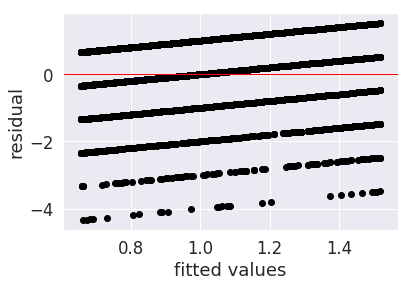

In [163]:
#  plotting the residuals 

plt.scatter(apolpre, resds, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= resds.mean(), color='red', linewidth=1)
plt.show()

In [164]:
# determining heteroskedasticity using bartlet's test

tes_res, p_val = sp.stats.bartlett(apolpre.flatten(), resds.flatten())

deg_of_f = len(apolpre)-1
pro = 1 - p_val

crit_val = sp.stats.chi2.ppf(pro, deg_of_f)
print(p_val)


if (tes_res > crit_val):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

  
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data


0.0
the variances are homogeneous!


In [165]:
lcub = linr.fit(xx_cube, lebos_train)

# making predictions
ay_cube_fit = lcub.predict(cub.fit_transform(ficha_fit))

# calculating R squared

acubpre = linpol.predict(xx_cube)
acub_r2 = r2_score(lebos_train, acubpre)

# getting the rmse

print('Cubic RMSE: ', np.sqrt(mean_squared_error(lebos_train, acubpre)), '\nCubic r_squared: ', cub_r2)

Cubic RMSE:  1.1373905623923517 
Cubic r_squared:  0.03544787551614892


In [166]:
# getting the residuals

rsd = np.subtract(acubpre, lebos_train)
pd.DataFrame(rsd)

rsd.mean()

0.4881657614452023

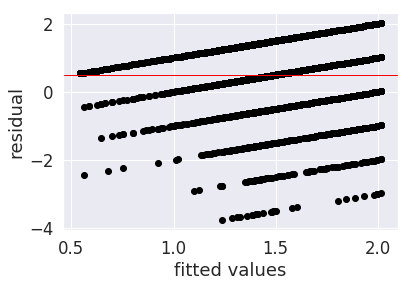

In [167]:
#  plotting the residuals 

plt.scatter(acubpre, rsd, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= rsd.mean(), color='red', linewidth=1)
plt.show()

Most of the residuals are negative, meaning predictions were less than the actual values

In [168]:
# determining heteroskedasticity using bartlet's test

t_res, p_va = sp.stats.bartlett(acubpre.flatten(), rsd.flatten())

dg_of_f = len(acubpre)-1
pr = 1 - p_va

c_val = sp.stats.chi2.ppf(pr, dg_of_f)
print(p_va)



if (t_res > c_val):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

0.0
the variances are homogeneous!


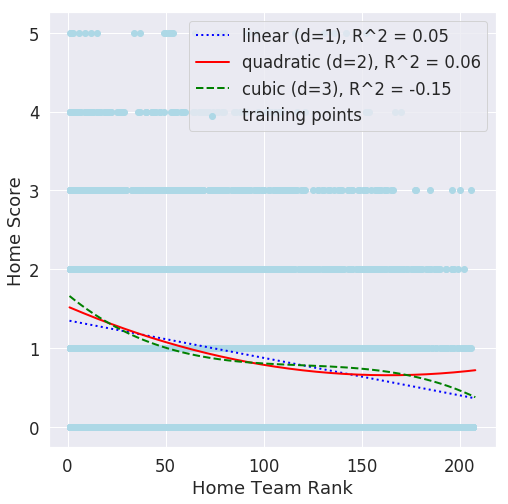

In [169]:
#  Plotting the results
plt.figure(figsize=(8, 8))
plt.scatter(ficha_train, lebos_train, label='training points', color='lightblue')
plt.plot(
    ficha_fit, y_lin_p,
    label=f'linear (d=1), R^2 = {al_r2:.2f}',
    color='blue', lw=2, linestyle=':'
)
plt.plot(
    ficha_fit, ay_quad_fit,
    label=f'quadratic (d=2), R^2 = {aquad_r2:.2f}',
    color='red', lw=2, linestyle='-'
)
plt.plot(
    ficha_fit, ay_cube_fit,
    label=f'cubic (d=3), R^2 = {acub_r2:.2f}',
    color='green', lw=2, linestyle='--'
)

plt.xlabel('Home Team Rank')
plt.ylabel('Home Score')
plt.legend(loc='upper right')
plt.show()

In [170]:
# cross-validation of polynomial regression

normalize = [True, False]
fit_intercept = [True, False]

pars = dict(normalize=normalize, fit_intercept=fit_intercept)

# instantiating a 10-fold cross validation
folds = KFold(n_splits=10)

grid = GridSearchCV(estimator=linr, param_grid= pars, cv= folds, scoring='neg_mean_squared_error')

# fitting the gridsearch

grid_rslts = grid.fit(ficha, lebos)

print('Best score: {}' .format(grid.best_score_))
print('Best parameters: {}' .format(grid.best_params_))

Best score: -1.077619930222222
Best parameters: {'fit_intercept': True, 'normalize': True}


In [171]:
# getting the cross-validation score of model
cross_score = cross_val_score(linr, ficha, lebos, cv=10, scoring='r2')

print('cross val score: %.3f ' % (cross_score.mean()))

cross val score: 0.053 


### Logistic Regression

In [0]:
# creating a new dataframe that is a replica of out_f
log_df= out_f

In [0]:
# defining the features and target of the model

log_feat = log_df.drop(['status', 'home_score', 'away_score'], 1)
log_lebo = log_df['status']


In [174]:
# creating dummy variables to convert categorical columns to numerical variables

log_dum = pd.get_dummies(log_feat, drop_first=True)
log_dum.head()

,year,month,home_rank,away_rank,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,...,tournament_Baltic Cup,tournament_CECAFA Cup,tournament_CFU Caribbean Cup,tournament_CFU Caribbean Cup qualification,tournament_COSAFA Cup,tournament_Confederations Cup,tournament_Copa América,tournament_Copa América qualification,tournament_Copa Paz del Chaco,tournament_Copa del Pacífico,tournament_Cyprus International Tournament,tournament_EAFF Championship,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup,tournament_Gulf Cup,tournament_Intercontinental Cup,tournament_King's Cup,tournament_Kirin Cup,tournament_Lunar New Year Cup,tournament_Malta International Tournament,tournament_Merdeka Tournament,tournament_Nations Cup,tournament_Nehru Cup,tournament_Nile Basin Tournament,tournament_OSN Cup,tournament_Oceania Nations Cup,tournament_Oceania Nations Cup qualification,tournament_Pacific Games,tournament_SAFF Cup,tournament_South Pacific Games,tournament_UAFA Cup,tournament_UAFA Cup qualification,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UNCAF Cup,tournament_VFF Cup,tournament_WAFF Championship,tournament_Windward Islands Tournament
0,2006,1,89.0,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,32.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006,1,28.0,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,1,32.0,49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2006,1,35.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# splitting features and target variables to train and test sets
lfeat_train, lfeat_test, llebo_train, llebo_test = train_test_split(log_dum,log_lebo, test_size=0.2, random_state=123)


In [176]:
# instantiating the model 
logreg = LogisticRegression()

# training the model on the training set
logreg.fit(lfeat_train, llebo_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
# making predicitons with model
log_pred = logreg.predict(lfeat_test)
log_pred

# win displayed from home team's perspective

array(['Win', 'Win', 'Win', ..., 'Win', 'Win', 'Lose'], dtype=object)

In [178]:
# evaluating the performance of the model
print('Logistic Model Accuracy: {:.4f}' .format(accuracy_score(llebo_test, log_pred)))

print('Confusion Matrix: \n{}' .format(confusion_matrix(llebo_test, log_pred)))

Logistic Model Accuracy: 0.5688
Confusion Matrix: 
[[  5 130 222]
 [  6 196 131]
 [  8  95 580]]


Prediction accuracy when using a Logistic Model is 56.88%

In [179]:
train_accuracy = logreg.score(lfeat_train, llebo_train)
test_accuracy = logreg.score(lfeat_test, llebo_test)

print('Training set accuracy: %.4f' % train_accuracy)
print('Test set accuracy: %.4f' % test_accuracy)


Training set accuracy: 0.6209
Test set accuracy: 0.5688


  The developed logistic model has 62% accuracy on the training set and 56.88% accuracy on the test set.

#### Hyperparameter Tuning

#### Cross-validation

In [0]:
# instantiating LogisticRegression object and defining parameters

llreg =LogisticRegression(penalty='l1', dual=False, max_iter=110)

In [181]:
# fitting the model with the training sets

llreg.fit(lfeat_train,llebo_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
# getting the accuracy score on the train model
llreg.score(lfeat_train, llebo_train)

0.6255009107468124

 Accuracy with training set is 62.57%

In [0]:
# instantiating 5-fold cross-validator

folds = KFold(n_splits=5, random_state=34)

In [184]:
# getting the cross validation score
from sklearn.model_selection import cross_val_score

cross_res = cross_val_score(llreg, log_dum, log_lebo, cv=folds, scoring='accuracy')
print(cross_res.mean())

0.5689968339848686


Accuracy with cross validation is approx 56.9%

#### Hyperparameter Tuning ussing GridSearchCV

In [185]:
# instantiating the logistic regression model
loreg = LogisticRegression()

# defining the paramenters/hyperparameters
penalty = ['l2']
dual = [True,False]
max_iter = [100,120,130]
C = [1.0,2.0,2.5]

# Creating hyperparameter options
hparameters = dict( penalty=penalty, dual=dual, max_iter=max_iter, C=C)

hparameters

{'C': [1.0, 2.0, 2.5],
 'dual': [True, False],
 'max_iter': [100, 120, 130],
 'penalty': ['l2']}

In [186]:
# creating grid search using 5-fold cross validation
hptun = GridSearchCV(estimator=loreg, param_grid=hparameters, cv=5, n_jobs=-1)
grid_res = hptun.fit(lfeat_train, llebo_train)

print('Best: %f using %s' % (grid_res.best_score_, grid_res.best_params_))


Best: 0.577960 using {'C': 1.0, 'dual': False, 'max_iter': 100, 'penalty': 'l2'}


According to the output, best accuracy score for logistic regression is 57.78%

Using hyperparameter tuning, the accuracy of the logistic model increases from 56.88% to 57.78%

The parameters that optimize the model are: C=1.0, dual=False, max_iter=100 and penalty=l2

##  Challenging the solution using a different model

In [187]:
!pip install xgboost

In [0]:

# Comparing performance of logistic model and xgboost


x = log_df.drop(['status', 'home_score', 'away_score'], 1)

y = log_df['status']

In [0]:
x = pd.get_dummies(pd.DataFrame(x), drop_first=True)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=456)

In [191]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [192]:
xgb_pred = xgb.predict(x_test)

# making predictions for the test set
xgb_pred

array(['Lose', 'Lose', 'Lose', ..., 'Lose', 'Lose', 'Draw'], dtype=object)

In [193]:
# evaluate accuracy of predictions

acc = accuracy_score(y_test, xgb_pred)
print('Accuracy: %.3f%%' % (acc * 100.0))

Accuracy: 58.776%


  Accuracy with XGBoost is 58.78%, which is higher than the accuracy exhibited by the logistic and polynomial regression models
  
  When determining the model for prediction, it may be advisable to opt for xgboost as it exhibits higher prediction accuracy

In [194]:
# creating a dataframe that holds the predicted match outcomes
df_pre = pd.DataFrame(log_pred, columns=['predictions'])
df_pre.head()

,predictions
0,Win
1,Win
2,Win
3,Lose
4,Lose


In [195]:
# creating a dataframe containing the match outcomes for the test set
y_act = pd.DataFrame(y_test)
y_act.head()

,status
4810,Win
6629,Lose
7053,Draw
3399,Win
6347,Win


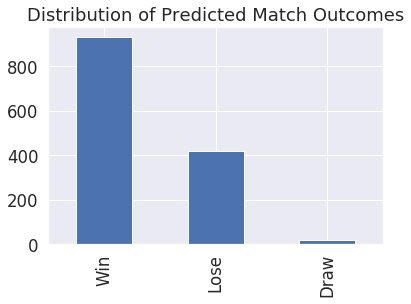

In [196]:
# comparing distribution of predicted match outcomes

df_pre.predictions.value_counts().plot(kind='bar')
plt.title('Distribution of Predicted Match Outcomes')
plt.show()

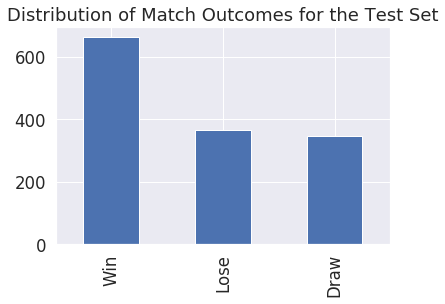

In [197]:
# plotting a barplot to show distribution of match outcomes for the test set
y_act.status.value_counts().plot(kind='bar')
plt.title('Distribution of Match Outcomes for the Test Set')
plt.show()

A comparison of the distribution of predicted match outcomes and actual match outcomes reveals that the model somewhat gets the predictions correct except for the matches that end in draws.

The predictions maintain the distribution/trend in match outcomes

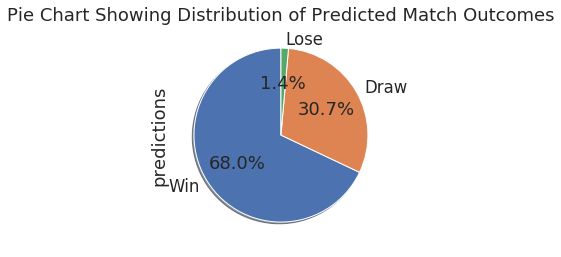

In [198]:
df_pre.predictions.value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Win', 'Draw', 'Lose'], startangle=90, shadow= True)
plt.title('Pie Chart Showing Distribution of Predicted Match Outcomes')
plt.show()

## Conclusion 

We may achieve better match outcome predictions using models other than regression models, for instance, XGBoost Classifier

We can also improve our predictions by stacking more models together to improve the accuracy of predictions

We may also improve our accuracy by using more data for training

